In [1]:
import numpy as np
import matplotlib.pyplot as plt
import galois

In [4]:
def circulant_matrix(row, k, open=True):
    return np.array([np.roll(row, i) for i in range(len(row)-k)])

def pcm(n, k):
    seed = np.zeros(n, dtype=int)
    seed[0] = seed[1] = seed[k] = 1
    return circulant_matrix(seed, k)

H = pcm(5,2)
m, n = H.shape
print(H.shape)
H

(3, 5)


array([[1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1]])

In [163]:
H = np.array(H)
Hx = np.hstack([np.kron(H, np.eye(H.shape[1], dtype=int)), np.kron(np.eye(H.shape[0], dtype=int), H.T)])
Hz = np.hstack([np.kron(np.eye(H.shape[1], dtype=int), H), np.kron(H.T, np.eye(H.shape[0], dtype=int))])
cm, cn = Hx.shape

(224, 452)


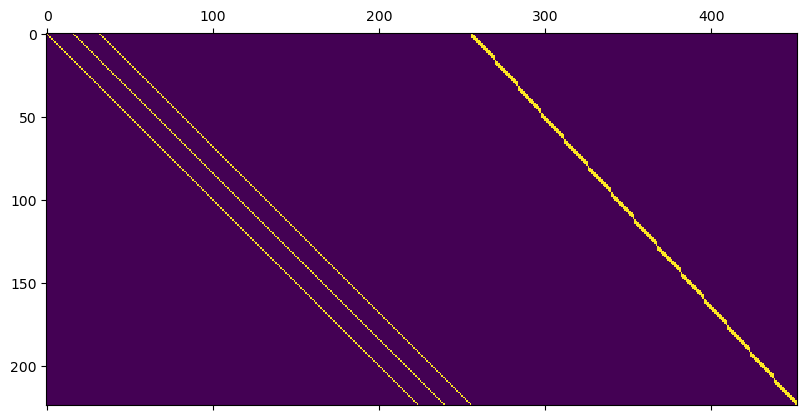

In [164]:
plt.matshow(Hx)
print(Hx.shape)

In [165]:
latticeL = np.arange(n**2).reshape(n,n)
latticeR = np.arange(n**2, cn).reshape(m,m)
latticeZ = np.arange(cn, cn+cm).reshape(m,n)
latticeX = np.arange(cn+cm, cn+cm+cm).reshape(n,m)

In [166]:
tmp1 = np.zeros((n, n+m), dtype=int)
for i in range(2*m):
    tmp1[:,i] = latticeL[:, i//2] if (i % 2 == 0) else latticeX[:, i//2]
if (m < n):
    tmp1[:, 2*m:] = latticeL[:, m:]

tmp2 = np.zeros((m, n+m), dtype=int)
for i in range(2*m):
    tmp2[:,i] = latticeZ[:, i//2] if (i % 2 == 0) else latticeR[:, i//2]
if (m < n):
    tmp2[:, 2*m:] = latticeZ[:, m:]

lattice = np.zeros((m+n, m+n), dtype=int)
for i in range(2*m):
    lattice[i] = tmp1[i//2] if (i % 2 == 0) else tmp2[i//2]
if (m < n):
    lattice[2*m:] = tmp1[m:]

In [167]:
tmp1

array([[  0, 676,   1, 677,   2, 678,   3, 679,   4, 680,   5, 681,   6,
        682,   7, 683,   8, 684,   9, 685,  10, 686,  11, 687,  12, 688,
         13, 689,  14,  15],
       [ 16, 690,  17, 691,  18, 692,  19, 693,  20, 694,  21, 695,  22,
        696,  23, 697,  24, 698,  25, 699,  26, 700,  27, 701,  28, 702,
         29, 703,  30,  31],
       [ 32, 704,  33, 705,  34, 706,  35, 707,  36, 708,  37, 709,  38,
        710,  39, 711,  40, 712,  41, 713,  42, 714,  43, 715,  44, 716,
         45, 717,  46,  47],
       [ 48, 718,  49, 719,  50, 720,  51, 721,  52, 722,  53, 723,  54,
        724,  55, 725,  56, 726,  57, 727,  58, 728,  59, 729,  60, 730,
         61, 731,  62,  63],
       [ 64, 732,  65, 733,  66, 734,  67, 735,  68, 736,  69, 737,  70,
        738,  71, 739,  72, 740,  73, 741,  74, 742,  75, 743,  76, 744,
         77, 745,  78,  79],
       [ 80, 746,  81, 747,  82, 748,  83, 749,  84, 750,  85, 751,  86,
        752,  87, 753,  88, 754,  89, 755,  90, 756,

In [168]:
tmp2

array([[452, 256, 453, 257, 454, 258, 455, 259, 456, 260, 457, 261, 458,
        262, 459, 263, 460, 264, 461, 265, 462, 266, 463, 267, 464, 268,
        465, 269, 466, 467],
       [468, 270, 469, 271, 470, 272, 471, 273, 472, 274, 473, 275, 474,
        276, 475, 277, 476, 278, 477, 279, 478, 280, 479, 281, 480, 282,
        481, 283, 482, 483],
       [484, 284, 485, 285, 486, 286, 487, 287, 488, 288, 489, 289, 490,
        290, 491, 291, 492, 292, 493, 293, 494, 294, 495, 295, 496, 296,
        497, 297, 498, 499],
       [500, 298, 501, 299, 502, 300, 503, 301, 504, 302, 505, 303, 506,
        304, 507, 305, 508, 306, 509, 307, 510, 308, 511, 309, 512, 310,
        513, 311, 514, 515],
       [516, 312, 517, 313, 518, 314, 519, 315, 520, 316, 521, 317, 522,
        318, 523, 319, 524, 320, 525, 321, 526, 322, 527, 323, 528, 324,
        529, 325, 530, 531],
       [532, 326, 533, 327, 534, 328, 535, 329, 536, 330, 537, 331, 538,
        332, 539, 333, 540, 334, 541, 335, 542, 336,

In [169]:
lattice

array([[  0, 676,   1, 677,   2, 678,   3, 679,   4, 680,   5, 681,   6,
        682,   7, 683,   8, 684,   9, 685,  10, 686,  11, 687,  12, 688,
         13, 689,  14,  15],
       [452, 256, 453, 257, 454, 258, 455, 259, 456, 260, 457, 261, 458,
        262, 459, 263, 460, 264, 461, 265, 462, 266, 463, 267, 464, 268,
        465, 269, 466, 467],
       [ 16, 690,  17, 691,  18, 692,  19, 693,  20, 694,  21, 695,  22,
        696,  23, 697,  24, 698,  25, 699,  26, 700,  27, 701,  28, 702,
         29, 703,  30,  31],
       [468, 270, 469, 271, 470, 272, 471, 273, 472, 274, 473, 275, 474,
        276, 475, 277, 476, 278, 477, 279, 478, 280, 479, 281, 480, 282,
        481, 283, 482, 483],
       [ 32, 704,  33, 705,  34, 706,  35, 707,  36, 708,  37, 709,  38,
        710,  39, 711,  40, 712,  41, 713,  42, 714,  43, 715,  44, 716,
         45, 717,  46,  47],
       [484, 284, 485, 285, 486, 286, 487, 287, 488, 288, 489, 289, 490,
        290, 491, 291, 492, 292, 493, 293, 494, 294,